In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import ttest_ind
import time
import os
import pickle
from itertools import islice

## import self-written packages 
from adafdr.util import *
import adafdr.method as md
import adafdr.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
input_folder = '/data3/martin/gtex_data/GTEx_Analysis_v7_eQTL_all_associations'
file_list = ['Adipose_Subcutaneous.allpairs.txt.processed.augmented_related.txt',
             'Adipose_Visceral_Omentum.allpairs.txt.processed.augmented_related.txt',
             'Colon_Sigmoid.allpairs.txt.processed.augmented_related.txt',
             'Colon_Transverse.allpairs.txt.processed.augmented_related.txt']
output_folder = '/home/martin/NeuralFDR2/AdaFDRpaper/experiments_v1/temp_result'

In [3]:
# bins
n_bin_p = 20
bin_exp = np.linspace(0,2.5,6)
bin_maf = np.linspace(0,1,6)
bin_dist = np.linspace(0,1000000,5)
bin_chro = np.linspace(0.5, 15.5, 16)
bin_p = np.linspace(0,1,n_bin_p+1)
# 
h_exp = np.zeros([n_bin_p, bin_exp.shape[0]-1], dtype=int)
h_maf = np.zeros([n_bin_p, bin_maf.shape[0]-1], dtype=int)
h_dist = np.zeros([n_bin_p, bin_dist.shape[0]-1], dtype=int)
h_chro = np.zeros([n_bin_p, 15], dtype=int)
h_p_other = np.zeros([n_bin_p, n_bin_p], dtype=int)

In [4]:
# batch_size = 5
# n_line = 10
batch_size = 1000000
# n_line = 50000
start_time = time.time()
for filename in file_list:
    input_file = input_folder + '/' + filename 
    line_ct = 0
    p = []
    p_other = []
    maf = []
    exp = []
    dist = []
    chro = []
    with open(input_file, 'r') as f:
        for line in f:
            line = line.strip().split(',')
            exp.append(np.log10(float(line[1])+0.5))
            maf.append(float(line[2]))
            dist.append(np.absolute(float(line[3])))
            chro.append(int(line[4]))
            p.append(float(line[6]))
            p_other.append(float(line[7]))
            line_ct += 1
            if line_ct%batch_size == 0:
                # log10 exp level
                h,_,_ = np.histogram2d(p,exp,bins=[bin_p, bin_exp])
                h_exp = h_exp + h
                # MAF
                h,_,_ = np.histogram2d(p,maf,bins=[bin_p, bin_maf])
                h_maf = h_maf + h
                # distance from TSS
                h,_,_ = np.histogram2d(p,dist,bins=[bin_p, bin_dist])
                h_dist = h_dist + h
                # Chromatin 
                h,_,_ = np.histogram2d(p,chro,bins=[bin_p, bin_chro])
                h_chro = h_chro + h
                  # p_other
                h,_,_ = np.histogram2d(p,p_other,bins=[bin_p, bin_p])
                h_p_other = h_p_other + h
                # clear the buffer 
                exp = []
                maf = []
                dist = []
                chro = []
                p = []
                p_other = []
                print('line_ct = %d'%line_ct)
#             if line_ct == n_line:
#                 break
    fil = open(output_folder+'/summary_%s.pickle'%filename, 'wb')
    pickle.dump(h_exp, fil)
    pickle.dump(h_maf, fil)
    pickle.dump(h_dist, fil)
    pickle.dump(h_chro, fil)
    pickle.dump(h_p_other, fil)
    fil.close()
print('Time=%0.3fs'%(time.time()-start_time))

/home/martin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/martin/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/martin/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


line_ct = 1000000
line_ct = 2000000
line_ct = 3000000
line_ct = 4000000
line_ct = 5000000
line_ct = 6000000
line_ct = 7000000
line_ct = 8000000
line_ct = 9000000
line_ct = 10000000
line_ct = 11000000
line_ct = 12000000
line_ct = 13000000
line_ct = 14000000
line_ct = 15000000
line_ct = 16000000
line_ct = 17000000
line_ct = 18000000
line_ct = 19000000
line_ct = 20000000
line_ct = 21000000
line_ct = 22000000
line_ct = 23000000
line_ct = 24000000
line_ct = 25000000
line_ct = 26000000
line_ct = 27000000
line_ct = 28000000
line_ct = 29000000
line_ct = 30000000
line_ct = 31000000
line_ct = 32000000
line_ct = 33000000
line_ct = 34000000
line_ct = 35000000
line_ct = 36000000
line_ct = 37000000
line_ct = 38000000
line_ct = 39000000
line_ct = 40000000
line_ct = 41000000
line_ct = 42000000
line_ct = 43000000
line_ct = 44000000
line_ct = 45000000
line_ct = 46000000
line_ct = 47000000
line_ct = 48000000
line_ct = 49000000
line_ct = 50000000
line_ct = 51000000
line_ct = 52000000
line_ct = 53000000
li

line_ct = 82000000
line_ct = 83000000
line_ct = 84000000
line_ct = 85000000
line_ct = 86000000
line_ct = 87000000
line_ct = 88000000
line_ct = 89000000
line_ct = 90000000
line_ct = 91000000
line_ct = 92000000
line_ct = 93000000
line_ct = 94000000
line_ct = 95000000
line_ct = 96000000
line_ct = 97000000
line_ct = 98000000
line_ct = 99000000
line_ct = 100000000
line_ct = 101000000
line_ct = 102000000
line_ct = 103000000
line_ct = 104000000
line_ct = 105000000
line_ct = 106000000
line_ct = 107000000
line_ct = 108000000
line_ct = 109000000
line_ct = 110000000
line_ct = 111000000
line_ct = 112000000
line_ct = 113000000
line_ct = 114000000
line_ct = 115000000
line_ct = 116000000
line_ct = 117000000
line_ct = 118000000
line_ct = 119000000
line_ct = 120000000
line_ct = 121000000
line_ct = 122000000
line_ct = 123000000
line_ct = 124000000
line_ct = 125000000
line_ct = 126000000
line_ct = 127000000
line_ct = 128000000
line_ct = 129000000
line_ct = 130000000
line_ct = 131000000
line_ct = 13200000

# Generate the figures 

Adipose_Subcutaneous.allpairs.txt.processed.augmented_related.txt


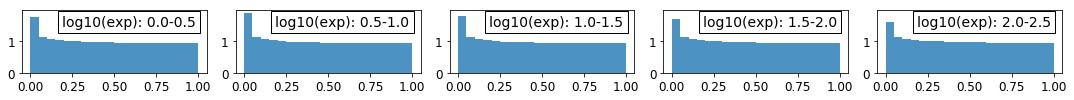

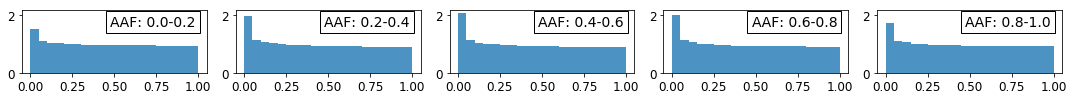

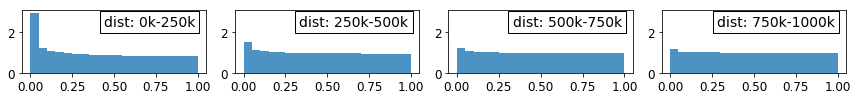

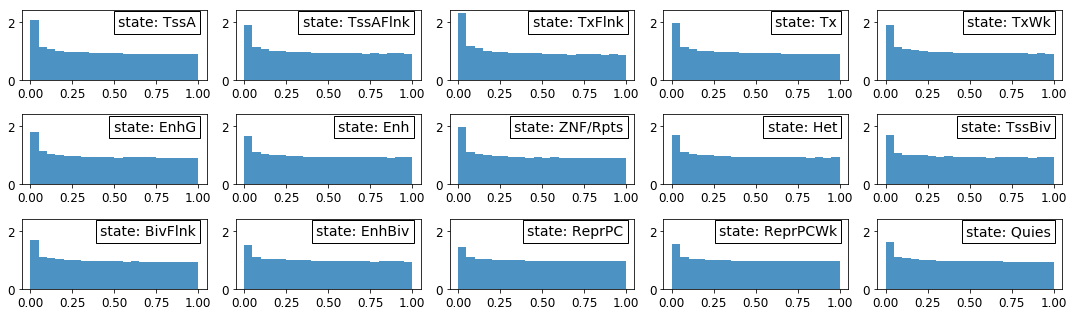

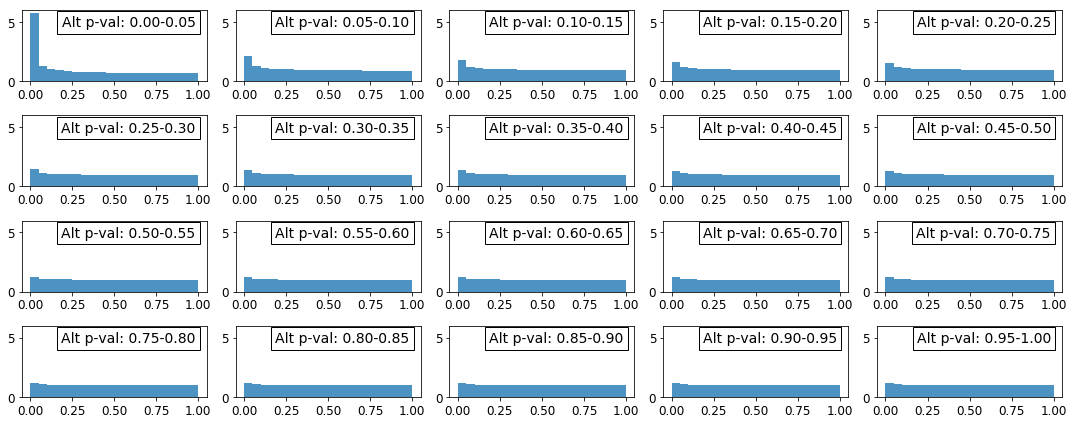

Adipose_Visceral_Omentum.allpairs.txt.processed.augmented_related.txt


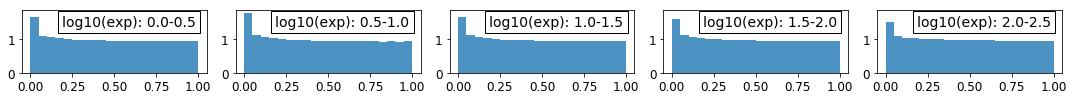

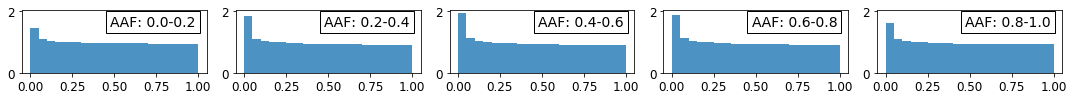

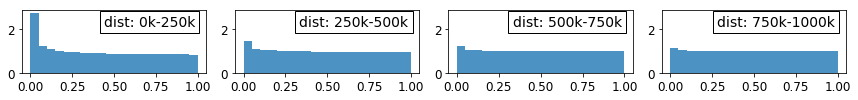

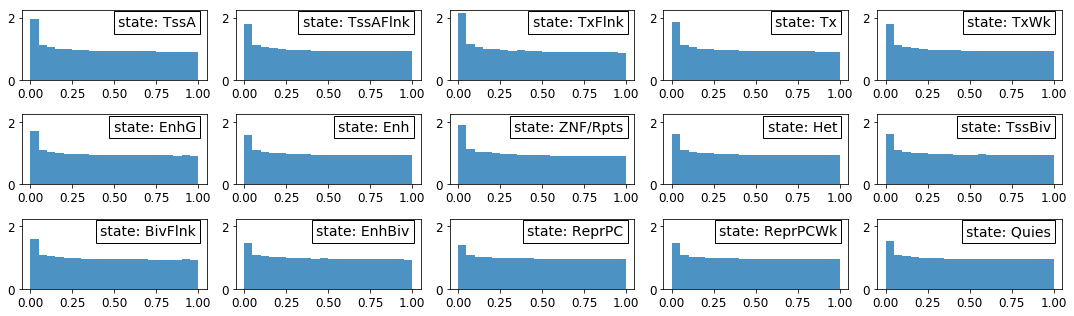

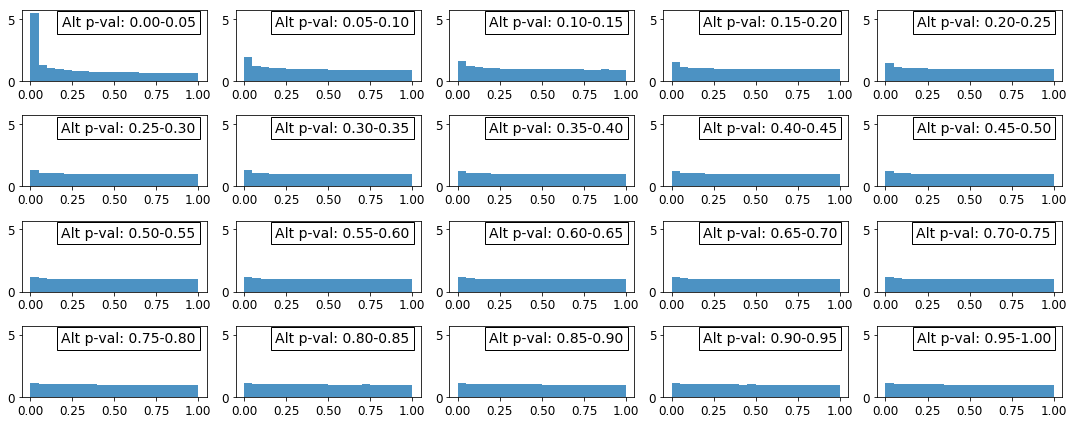

Colon_Sigmoid.allpairs.txt.processed.augmented_related.txt


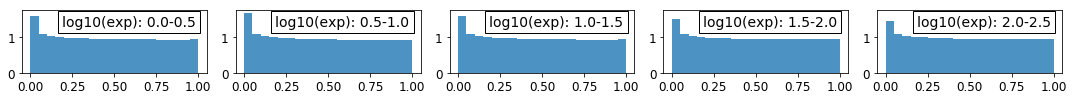

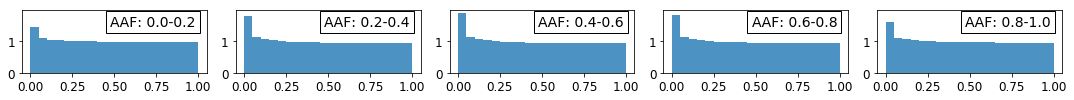

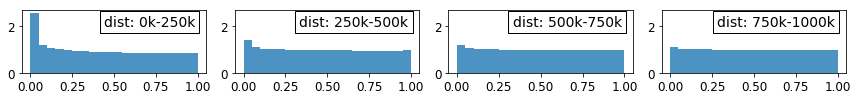

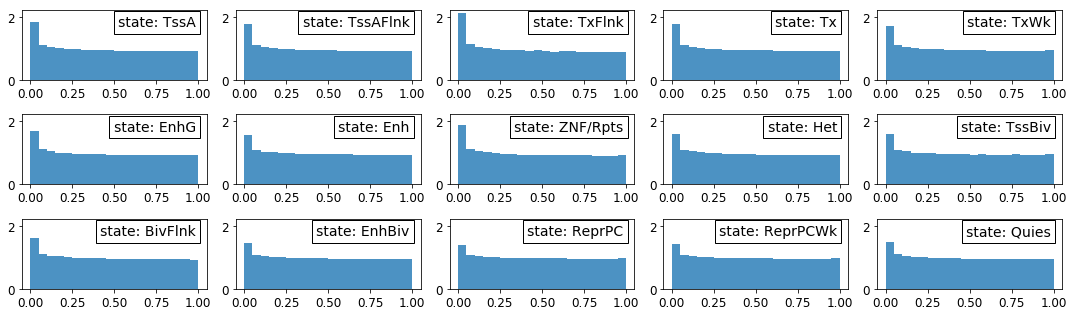

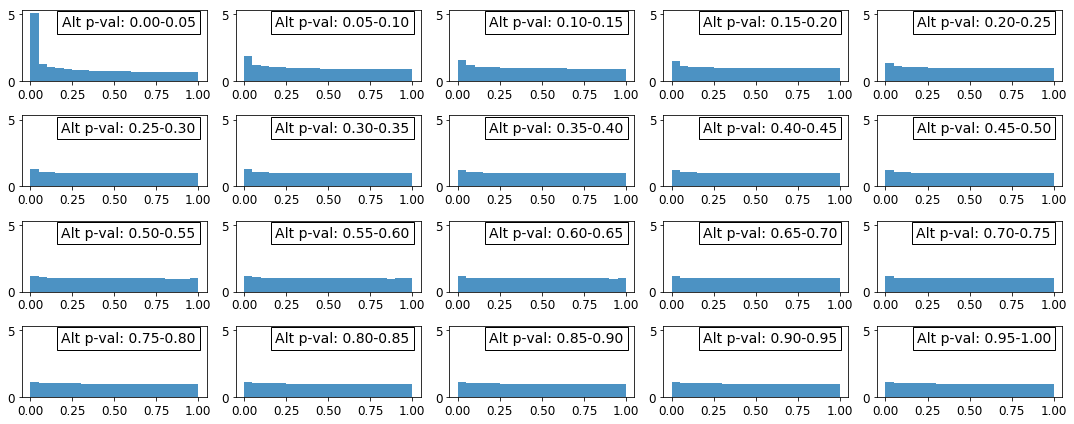

Colon_Transverse.allpairs.txt.processed.augmented_related.txt


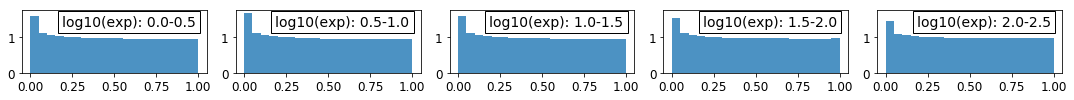

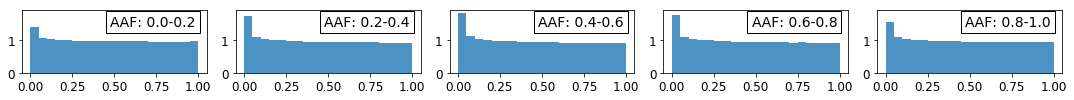

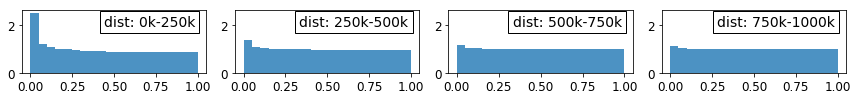

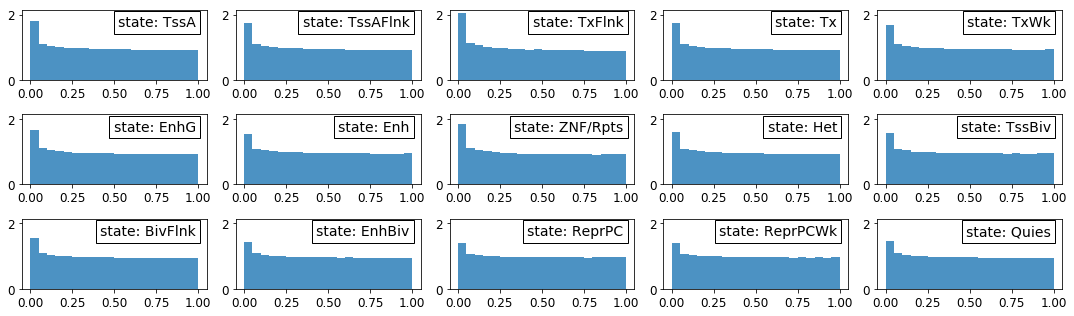

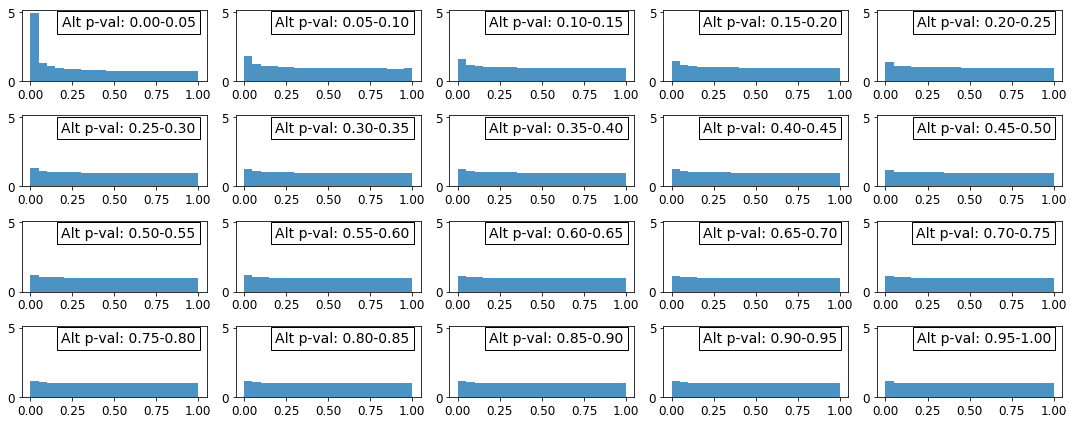

In [8]:
output_fig_folder = '/home/martin/NeuralFDR2/figures/fig_assumption'
for filename in file_list:
    print(filename)
    # read file 
    fil = open(output_folder+'/summary_%s.pickle'%filename,'rb') 
    h_exp = pickle.load(fil)
    h_maf = pickle.load(fil)
    h_dist = pickle.load(fil)
    h_chro = pickle.load(fil)
    h_p_other = pickle.load(fil)
    fil.close()
    # generate figures
    plot_assumption_check(h_exp, bin_exp, bin_p, cate_name=None,
                      output_folder=output_fig_folder, filename=filename,
                      figname ='exp', prefix='log10(exp)')
    plot_assumption_check(h_maf, bin_maf, bin_p, cate_name=None,
                          output_folder=output_fig_folder, filename=filename,
                          figname ='AAF', prefix='AAF')
    plot_assumption_check(h_dist, bin_dist, bin_p, cate_name=None,
                          output_folder=output_fig_folder, filename=filename,
                          figname ='dist', prefix='dist', if_dist=True)
    cate_name = {1: 'TssA', 2: 'TssAFlnk', 3: 'TxFlnk', 4: 'Tx',
                 5: 'TxWk', 6: 'EnhG', 7: 'Enh', 8: 'ZNF/Rpts',
                 9: 'Het', 10: 'TssBiv', 11: 'BivFlnk', 12: 'EnhBiv',
                 13: 'ReprPC', 14: 'ReprPCWk', 15: 'Quies'}
    plot_assumption_check(h_chro, bin_chro, bin_p, cate_name=cate_name,
                          output_folder=output_fig_folder, filename=filename,
                          figname ='chromatin', prefix='state' )
    plot_assumption_check(h_p_other, bin_p, bin_p, cate_name=None,
                          output_folder=output_fig_folder, filename=filename,
                          figname ='p_other', prefix='Alt p-val', alt_p=True)

In [6]:
def plot_assumption_check(h_, bin_, bin_p, cate_name=None, output_folder=None,
                          filename=None, figname=None, prefix=None, if_dist=False,
                          alt_p=False):
    width = bin_p[1] - bin_p[0]
    n_fig = h_.shape[1]
    n_row = int(np.ceil(n_fig/5))
    n_col = min(n_fig, 5)
    # Expression 
    plt.figure(figsize=[3*n_col, 1.5*n_row])
    temp_max = np.zeros([h_.shape[1]], dtype=float)
    for i_pic in range(h_.shape[1]):
        temp_h = h_[:, i_pic]
        temp_h = temp_h / np.sum(temp_h) /width
        temp_max[i_pic] = np.max(temp_h)
    temp_max = np.max(temp_max)*1.05
    for i_pic in range(n_fig):
        temp_h = h_[:, i_pic]
        temp_h = temp_h / np.sum(temp_h) /width
        plt.subplot(n_row, n_col, i_pic+1)
        plt.bar(bin_p[0:-1]+width/2, temp_h, width=width, alpha=0.8)
        if if_dist:
            label_str = '%s: %dk-%dk'%(prefix, bin_dist[i_pic]/1000, bin_dist[i_pic+1]/1000)
        elif cate_name is not None:
            label_str = '%s: %s'%(prefix, cate_name[bin_chro[i_pic]+0.5])
        elif alt_p is True:
            label_str = '%s: %0.2f-%0.2f'%(prefix, bin_[i_pic], bin_[i_pic+1])
        else:
            label_str = '%s: %0.1f-%0.1f'%(prefix, bin_[i_pic], bin_[i_pic+1])
        plt.annotate(label_str, xy=(0.94, 0.92), xycoords='axes fraction',
                     size=14, ha='right', va='top',
                     bbox=dict(boxstyle='square', fc='w'))
        plt.tick_params(labelsize=12)
        plt.ylim([0,temp_max])
    plt.tight_layout()
    if output_folder is not None:
        fig_path = '%s/%s_%s'%(output_folder, figname, filename)
        plt.savefig('%s.png'%(fig_path))
        plt.savefig('%s.pdf'%(fig_path))
    plt.show() 